# review on ML: 12/11

## Libraries

- pandas
- numpy
- matplotlib.pyplot
- seaborn
- sklearn > datasets
- sklearn.linear_model > LogisticRegression
- sklearn.model_selection > train_test_split
- sklearn.preprocessing > StandardScaler
- sklearn.metrics > accuacy_score, confusion_matrix, mean_squared_error, r2_score, ...

## Linear Regression

In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [2]:
# load dataset
d_X, d_y = datasets.load_diabetes(return_X_y=True)

In [3]:
dset = datasets.load_diabetes()
d_names = dset.feature_names

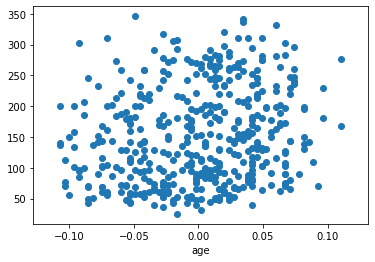

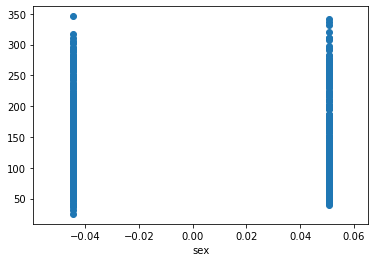

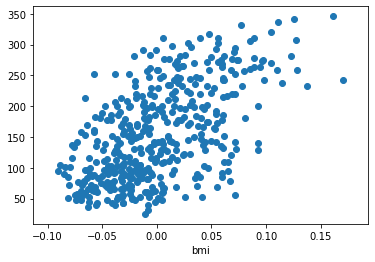

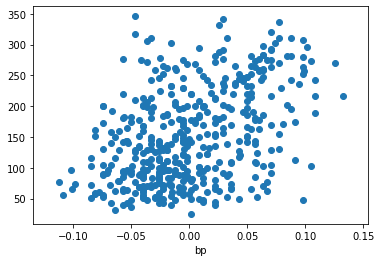

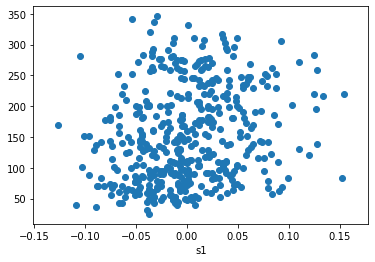

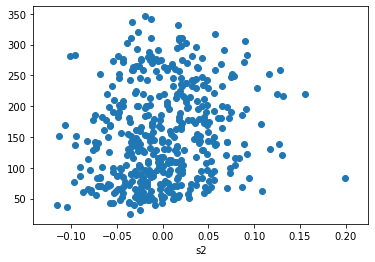

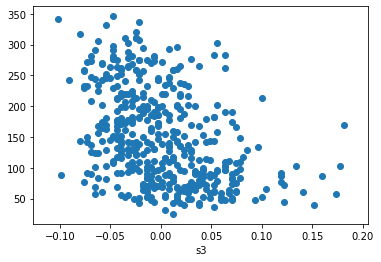

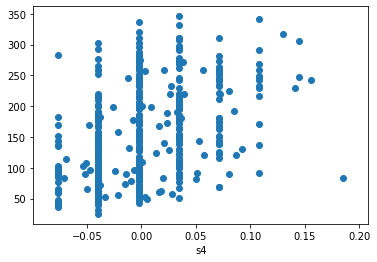

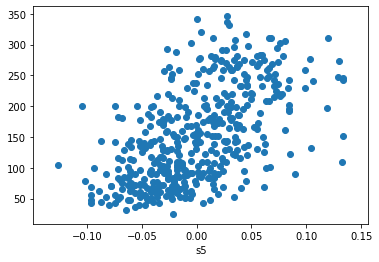

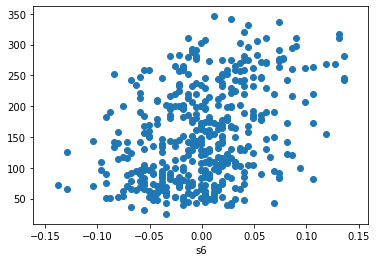

In [18]:
for i in range(10): 
    plt.scatter(d_X[:,i], d_y)
    plt.xlabel(d_names[i])
    plt.show()

In [33]:
sel_X = d_X[:,[2,8]]

In [34]:
X_train = sel_X[:-25]
X_test = sel_X[-25:]
y_train = d_y[:-25]
y_test = d_y[-25:]

print('train size', len(X_train), 'test size', len(X_test))

train size 417 test size 25


### Make model and training

In [35]:
from sklearn.linear_model import LinearRegression

regr = LinearRegression()
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [36]:
y_pred = regr.predict(X_test)

In [37]:
regr.coef_

array([683.25022636, 595.26164358])

In [48]:
regr.fit(X_train, y_train)
r2_score(y_test, y_pred), mean_squared_error(y_test, y_pred)

(0.5057624135654055, 2332.371223576053)

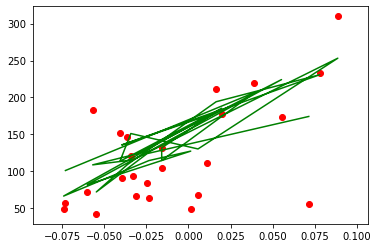

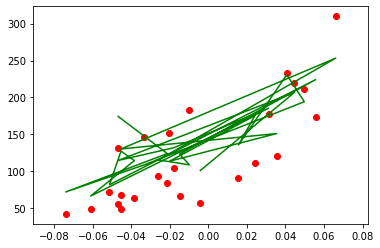

In [41]:
for i in range(2):
    plt.scatter(X_test[:,i], y_test, color='r')
    plt.plot(X_test[:,i], y_pred, color='g')
    plt.show()

### Deal with all features

In [53]:
X_train2 = d_X[:-25]
y_train2 = d_y[:-25]
X_test2 = d_X[-25:]
y_test2 = d_y[-25:]

regr2 = linear_model.LinearRegression()
regr2.fit(X_train2, y_train2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [54]:
y_pred2 = regr2.predict(X_test2)

In [55]:
print('LinReg for')
print(f'    2 features : {r2_score(y_test, y_pred):.2}')
print(f'  all features : {r2_score(y_test2, y_pred2):.2}')

LinReg for
    2 features : 0.51
  all features : 0.56


## Classification

In [57]:
dataset = pd.read_csv('data/iris.data',
                      names=[
                          'SepalLengthCm',
                          'SepalWidthCm',
                          'PetalLengthCm',
                          'PetalWidthCm',
                          'Species'
                      ])
dataset.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [58]:
# show size
dataset.groupby('Species').size()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [59]:
# create dataframe for species

setosa = dataset[dataset['Species']=='Iris-setosa']
versicolor = dataset[dataset['Species']=='Iris-versicolor']
virginica = dataset[dataset['Species']=='Iris-virginica']

In [60]:
print(dataset.describe())

       SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     150.000000    150.000000     150.000000    150.000000
mean        5.843333      3.054000       3.758667      1.198667
std         0.828066      0.433594       1.764420      0.763161
min         4.300000      2.000000       1.000000      0.100000
25%         5.100000      2.800000       1.600000      0.300000
50%         5.800000      3.000000       4.350000      1.300000
75%         6.400000      3.300000       5.100000      1.800000
max         7.900000      4.400000       6.900000      2.500000


<Figure size 432x288 with 0 Axes>

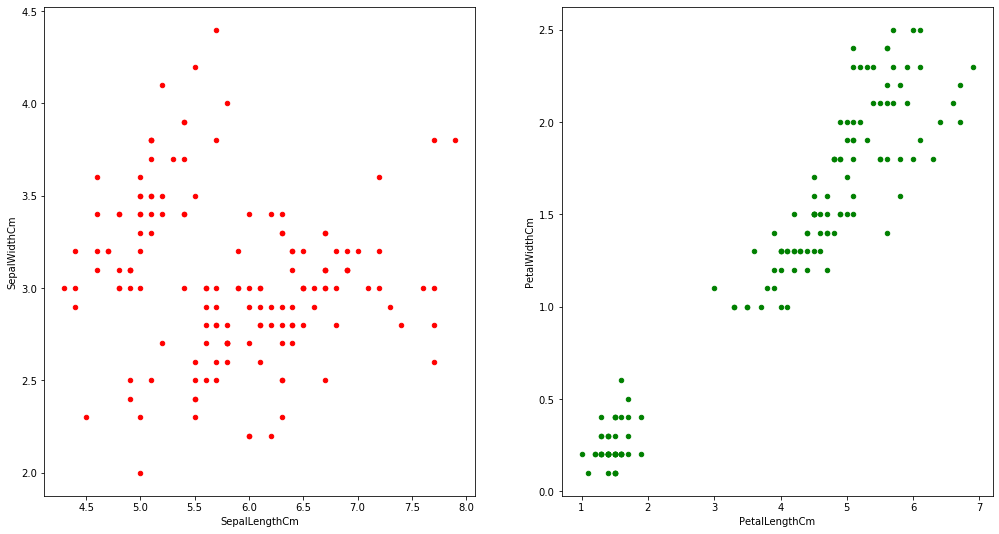

In [67]:
plt.figure()
fig, ax = plt.subplots(1,2, figsize=(17,9))
dataset.plot(x='SepalLengthCm', y='SepalWidthCm', kind='scatter', ax=ax[0], color='r')
dataset.plot(x='PetalLengthCm', y='PetalWidthCm', kind='scatter', ax=ax[1], color='g')
